#### Data Set Information:
This dataset is taken from a research explained here.

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe.

_** The main objective of this project is to perform the audit risk analysis using 776 target firm's historical data. Our main foucs is on determining the Rish Audit Score. We used several supervised techniques (Regression) to determine the Risk Audit Score  which will be discussed below.** _

_** We followed a sequence of steps starting with with importing required libraries, data merging, data pre-processing, data vizualization, etc. So let's get started **_

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing Datasets

In [3]:
audit = pd.read_csv('audit_risk.csv')
trial = pd.read_csv('trial.csv')

### Data Distribution

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
Risk,,,,,,,,,,,,,,,,,,,,,
0,471,471,471,471,471,471,471,471,471,471,...,471,471,471,471,471,471,471,471,471,471
1,305,305,305,305,305,305,305,305,305,305,...,305,305,305,305,305,305,305,305,305,305


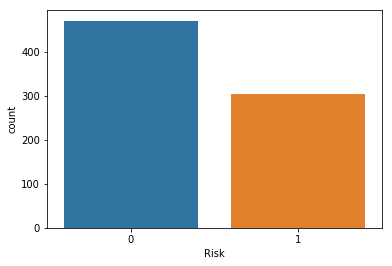

In [4]:
sns.countplot(audit['Risk'])
audit.groupby('Risk').count()

### Audit vs Risk

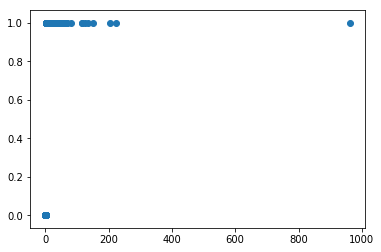

In [5]:
plt.scatter(audit['Audit_Risk'],audit['Risk'])

## We can see an outlier that screws can screw out analysis. We will handle this outlier in data pre-processing.

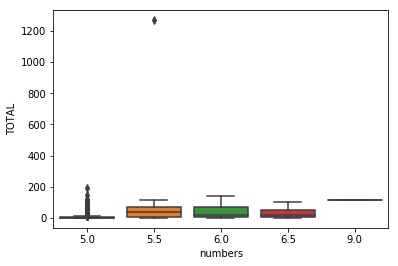

In [6]:
sns.boxplot(audit['numbers'],audit['TOTAL'])

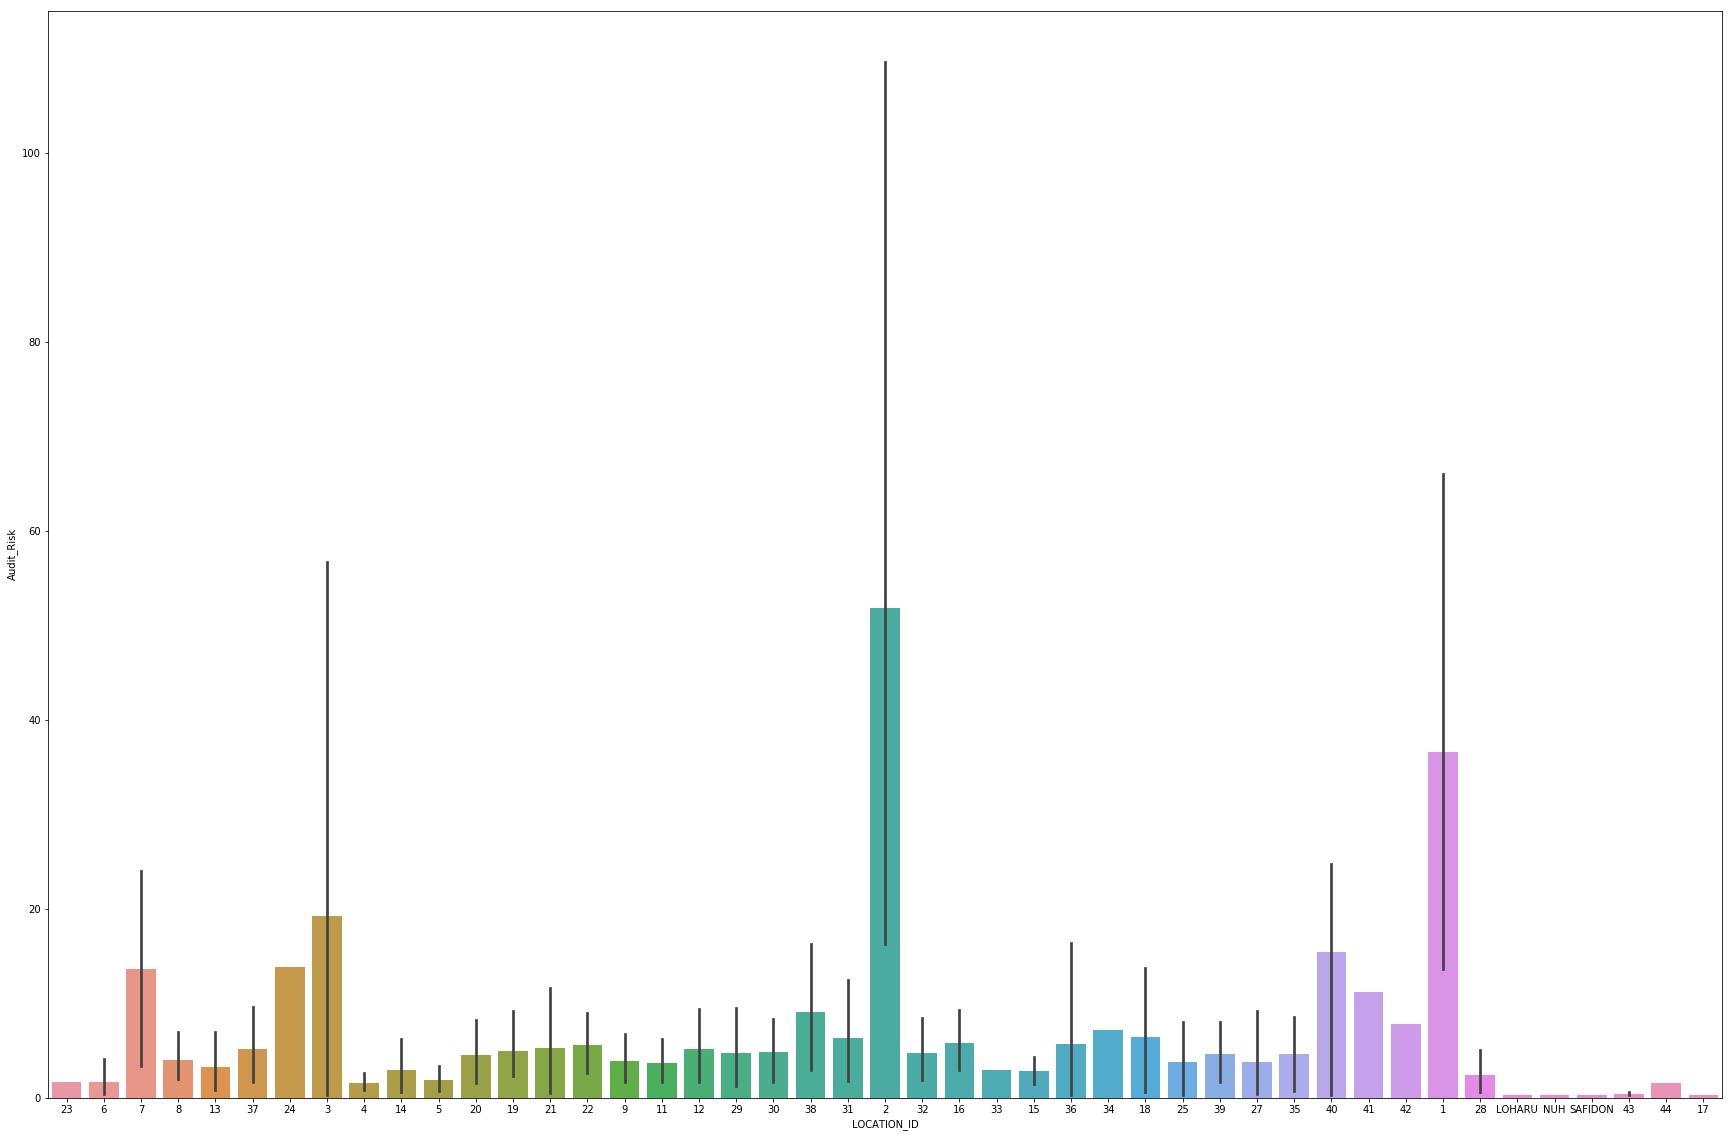

In [7]:
plt.figure(figsize=(30,20))
sns.barplot(x='LOCATION_ID',y='Audit_Risk',data= audit,estimator=np.mean)

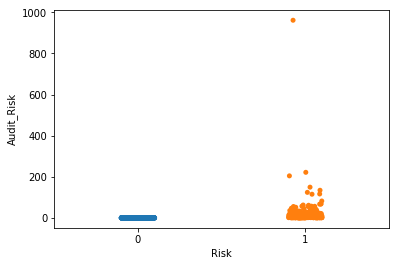

In [7]:
#loooking for outliers in the audit's risk colum
sns.stripplot(x='Risk',y='Audit_Risk',data=audit)

### Data Pre-processing
1. Imputing Missing values
2. Merging Data
3. Checking for outliers

_**1.) Imputing missing values **_ 

In [8]:
audit[audit['Money_Value'].isnull()]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
642,55.57,4,0.23,0.2,0.046,0.0,0.2,0.0,0.23,5.0,...,0.4,0,0.2,0.0,2.0,1.446,0.4,0.5,0.2892,0


In [9]:
trial[trial['Money_Value'].isnull()]

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
642,55.57,4,0.23,2,0.0,2,0.23,5.0,2,NaN,2,2,0,2,0,2,2.0,0


Both audit & trail have one missing value. Since dataset is small its better to impute the missing value rather than removing missing values. So let's impute the missing Money_Value with it's median grouped by 'Sector_Score' column

In [10]:
audit[['Sector_score','Money_Value']].groupby('Sector_score').median()

,Money_Value
Sector_score,
1.85,0.020
1.99,0.050
2.34,0.000
2.36,88.400
2.37,0.575
2.72,8.325
3.41,10.215
3.89,2.565
15.56,160.410


Sector_Score - Is the score of each firm mentioned above in Data Description

Missing value is in 'Money_Value' that falls under Sector_Score = 55.57.

Impute the missing value with median of Money_Value under Sector_score = 55.57

In [11]:
audit['Money_Value'].fillna(0,inplace=True)
trial['Money_Value'].fillna(0,inplace=True)

_** 2. Merging Datasets **_

Both dataframes (audit, trial) have similar columns that hold similar value

First sort by common columns and concatenate later

So selecting only unique column from trial data frame and concatenating to audit for analysis

In [12]:
# Sorting the data frames
audit = audit.sort_values(by=['LOCATION_ID','TOTAL'])
trial = trial.sort_values(by=['LOCATION_ID','TOTAL'])

#Concatinate data frames
data = pd.concat([audit,trial[['Loss','History_score','LOSS_SCORE','MONEY_Marks']]],axis=1)

In [13]:
data['LOCATION_ID'].unique()

array(['1', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2',
       '20', '21', '22', '23', '24', '25', '27', '28', '29', '3', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40',
       '41', '42', '43', '44', '5', '6', '7', '8', '9', 'LOHARU', 'NUH',
       'SAFIDON'], dtype=object)

LOCATION_ID has 3 observations with text in place of numbers
Since LOCATION_ID is a field with discrete so imputing the 3 text values with MODE of the LOCATION_ID distribution = 8

In [14]:
data['LOCATION_ID'].value_counts()

8          76
19         68
9          53
16         52
12         47
5          44
2          41
4          37
13         35
15         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
27          8
21          8
28          8
43          7
25          6
20          5
38          4
7           4
36          4
30          4
3           3
40          3
35          2
41          1
44          1
SAFIDON     1
24          1
34          1
33          1
17          1
42          1
LOHARU      1
23          1
NUH         1
Name: LOCATION_ID, dtype: int64

In [15]:
data['LOCATION_ID'].replace(['LOHARU', 'NUH','SAFIDON'],[8,8,8],inplace=True)

#### 3. Handling Outliers
In data distribution section we can across an outlier with large Audit_Risk, TOTAL value. We can handle this enither by imputing with a mean value or removing the outlier value.

Let's remove the outlier observation from data

In [16]:
data['TOTAL'].max()
# 1268.91

1268.91

In [20]:
data[data['TOTAL'] == 1268.91]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Loss,History_score,LOSS_SCORE,MONEY_Marks


In [21]:
# index = 241
data.drop(241,inplace=True)

KeyError: '[241] not found in axis'

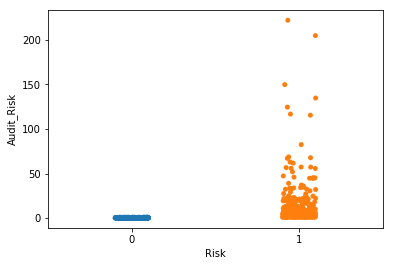

In [22]:
#loooking for outliers in the risk colum after removing outlier
sns.stripplot(x='Risk',y='Audit_Risk',data=data)

### Feature Selection

In [23]:
data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'Loss', 'History_score',
       'LOSS_SCORE', 'MONEY_Marks'],
      dtype='object')

([<matplotlib.axis.YTick at 0x17448ec90b8>,
 <a list of 30 Text yticklabel objects>)

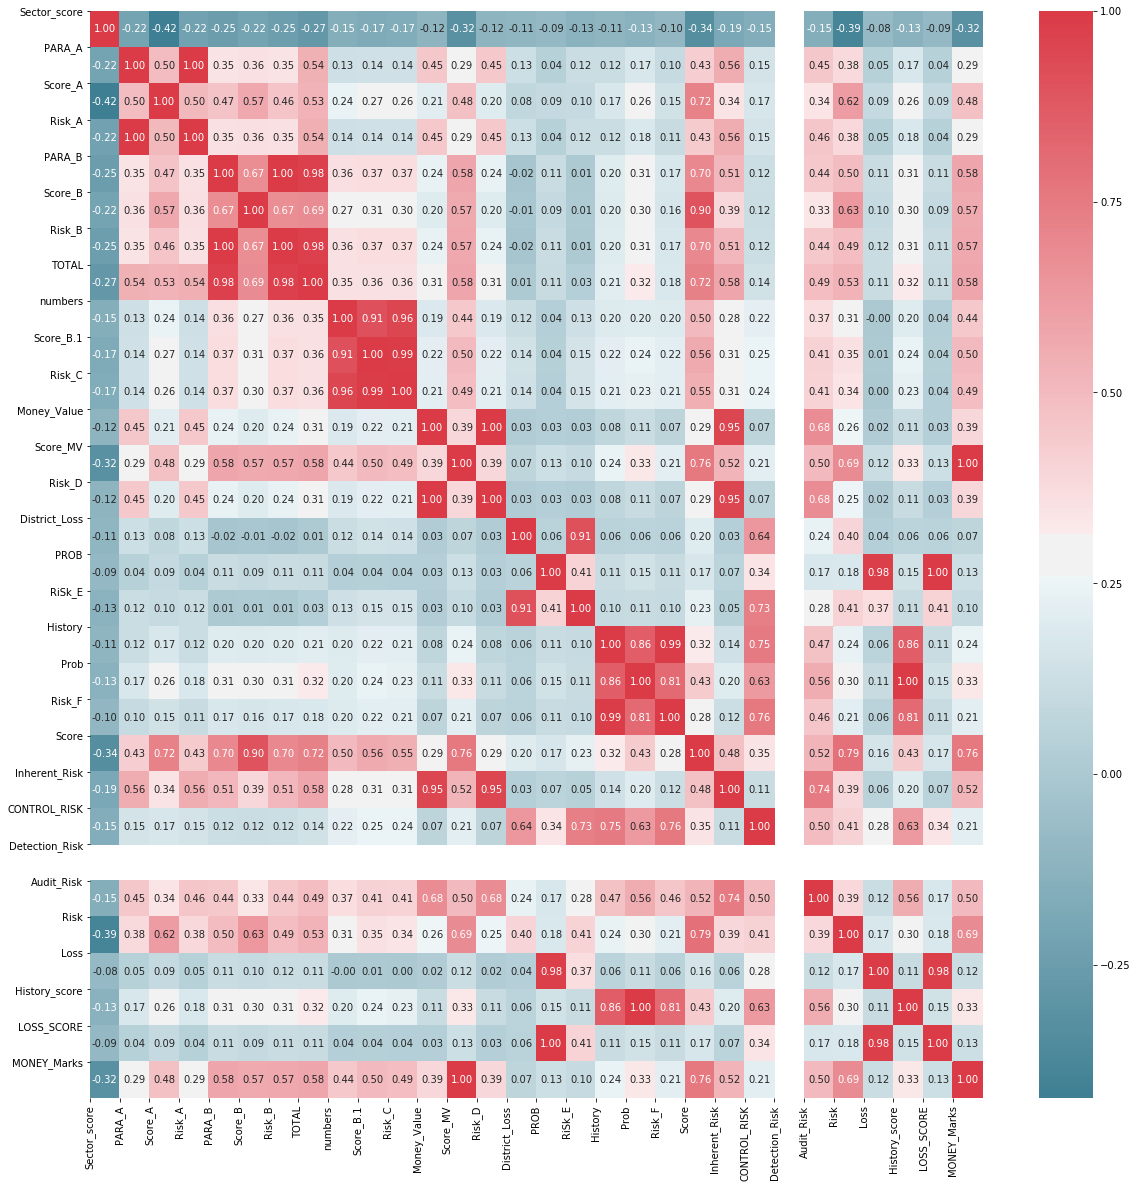

In [24]:
fig, ax = plt.subplots(figsize=(20, 20))
corr = data.corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

#Highly correlated variables deflects model's accuracy. So it's better to remove variables that are highly correlated. Choosing correlation = 0.7 as threshold and removing variables that have correlation greater than 0.7

#Below are the columns that that are considered for analysis which are less correlated

#Removing Risk column, because Risk column is formed based on Audit Risk Score. Risk is dependent om Audit Risk score.

In [25]:
data = data[['LOCATION_ID','Sector_score', 'PARA_A', 'Score_A','PARA_B', 'Score_B','numbers','Money_Value','Score_MV','District_Loss','LOSS_SCORE','History_score','Audit_Risk']]

In [27]:
data.columns

Index(['LOCATION_ID', 'Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Money_Value', 'Score_MV', 'District_Loss', 'LOSS_SCORE',
       'History_score', 'Audit_Risk'],
      dtype='object')

### Data Scaling
Since the variables we considered for analysis are not in same range we need to scale them before analysis.

In [28]:
X = data.drop('Audit_Risk',axis=1)
y = data['Audit_Risk']

from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Supervised Learning - Regression
1. Linear Regression
2. KNN Regressor
3. Ridge Regression
4. Lasso Regression
5. Polynomial Regression
6. SVR (kernal = linear, rbf,poly)
7. LinearSVR

#### 1.Linear Regression

In [61]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Train:%.4f"%lr.score(X_train,y_train))
print("Test:%.4f"%lr.score(X_test,y_test))

Train:0.8058
Test:0.6712


In [62]:
#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
bag_lr = BaggingRegressor(lr,n_estimators=500,max_samples=100,random_state=0)
bag_lr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_lr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_lr.score(X_test, y_test)))

Train score: 0.7429
Test score: 0.7616


In [63]:
#PAsting
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
bag_lr = BaggingRegressor(lr,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_lr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_lr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_lr.score(X_test, y_test)))

Train score: 0.7477
Test score: 0.7583


In [64]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
ada_lr = AdaBoostRegressor(lr,n_estimators=200,learning_rate=0.01)
ada_lr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_lr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_lr.score(X_test, y_test)))

Train score: 0.7474
Test score: 0.6016


### KNN Regressor

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
knn = KNeighborsRegressor()
#Most efficient parameter using GridSearch()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10)
grid.fit(X_train,y_train)
grid.best_score_
grid.best_estimator_

print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

results = pd.DataFrame(grid.cv_results_)
# show the first 5 rows
display(results.head())

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Tanmay\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  


Best parameters: {'n_neighbors': 2}
Best cross-validation score: 0.71


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001300,0.000455,0.001499,0.000505,1,{'n_neighbors': 1},0.442722,0.660687,0.847717,0.406250,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000893,0.000298,0.001408,0.000487,2,{'n_neighbors': 2},0.497689,0.587994,0.907165,0.528649,...,0.895247,0.899813,0.888151,0.921451,0.897555,0.900179,0.898265,0.898755,0.901014,0.008973
2,0.000983,0.000027,0.000994,0.000024,3,{'n_neighbors': 3},0.462032,0.760026,0.843674,0.522247,...,0.848419,0.883973,0.799032,0.856608,0.853465,0.859628,0.846687,0.876353,0.855127,0.024522
3,0.000998,0.000031,0.001107,0.000301,4,{'n_neighbors': 4},0.479910,0.735653,0.782921,0.525133,...,0.811039,0.837594,0.745151,0.836532,0.821020,0.827511,0.824351,0.830554,0.819021,0.032200
4,0.000604,0.000494,0.001486,0.000511,5,{'n_neighbors': 5},0.447486,0.703386,0.750523,0.560634,...,0.777353,0.802622,0.718395,0.793292,0.777737,0.791319,0.779096,0.795513,0.781080,0.032915


In [66]:
k = KNeighborsRegressor(n_neighbors=2)
k.fit(X_train,y_train)
print('Train score: {:.4f}'.format(k.score(X_train,y_train)))
print('Test score: {:.4f}'.format(k.score(X_test,y_test)))

Train score: 0.9001
Test score: 0.7054


In [67]:
#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
k = KNeighborsRegressor(n_neighbors=2)
bag_reg = BaggingRegressor(k,n_estimators=500,max_samples=100,bootstrap=True,random_state=0)
bag_reg.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.6014
Test score: 0.4835


In [68]:
#Pasting
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
k = KNeighborsRegressor(n_neighbors=2)
bag_knn_reg = BaggingRegressor(k,n_estimators=500,max_samples=100,bootstrap=False,random_state=0)
bag_knn_reg.fit(X_train,y_train)
print('Train score: {:.2f}'.format(bag_knn_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_knn_reg.score(X_test, y_test)))

Train score: 0.60
Test score: 0.48


In [69]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
k = KNeighborsRegressor(n_neighbors=2)

ada_knn = AdaBoostRegressor(k,n_estimators=200,learning_rate=0.01)
ada_knn.fit(X_train,y_train)
print('Train score: {:.2f}'.format(ada_knn.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_knn.score(X_test, y_test)))

Train score: 1.00
Test score: 0.47


### Ridge Regression

Text(0.5, 0, '$\\alpha$')

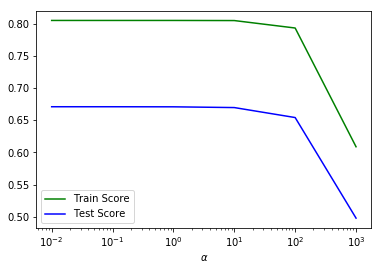

In [70]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100,1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [71]:
# GridSearch()
from sklearn.model_selection import GridSearchCV
alphas = np.array([1000,100,10,1,0.1,0.01,0.001])
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train,y_train)

print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

results = pd.DataFrame(grid.cv_results_)
# show the first 5 rows
display(results.head())

Best parameters: {'alpha': 100.0}
Best cross-validation score: 0.75


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are ac

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.001330,4.701341e-04,0.000332,4.700217e-04,1000,{'alpha': 1000.0},0.403059,0.557871,0.707793,0.555997,0.124364,7,0.539104,0.501015,0.584395,0.541505,0.034082
1,0.000997,5.619580e-07,0.000998,1.123916e-07,100,{'alpha': 100.0},0.692008,0.834225,0.735085,0.753803,0.059588,1,0.825300,0.755850,0.795148,0.792099,0.028435
2,0.000997,1.123916e-07,0.000332,4.700217e-04,10,{'alpha': 10.0},0.739914,0.837866,0.664837,0.747672,0.070823,2,0.858533,0.782627,0.809685,0.816948,0.031411
3,0.000997,4.899036e-07,0.000666,4.706966e-04,1,{'alpha': 1.0},0.741755,0.833114,0.651405,0.742237,0.074153,3,0.859338,0.783161,0.809931,0.817477,0.031553
4,0.000997,2.973602e-07,0.000332,4.701340e-04,0.1,{'alpha': 0.1},0.741834,0.832535,0.649939,0.741583,0.074514,4,0.859347,0.783167,0.809934,0.817483,0.031555


In [72]:
ridge = Ridge(alpha = 100)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.7939
Test score: 0.6544


In [73]:
#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 100)
bag_ridge = BaggingRegressor(ridge,n_estimators=500,max_samples=100,random_state=0)
bag_ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_ridge.score(X_test, y_test)))

Train score: 0.6110
Test score: 0.4950


In [74]:
#Pasting
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 100)
bag_ridge = BaggingRegressor(ridge,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_ridge.score(X_test, y_test)))

Train score: 0.6127
Test score: 0.4985


In [75]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 100)
ada_ridge = AdaBoostRegressor(ridge,n_estimators=200,learning_rate=0.01)
ada_ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ada_ridge.score(X_test, y_test)))

Train score: 0.7581
Test score: 0.5972


### Lasso Regression

Text(0.5, 0, '$\\alpha$')

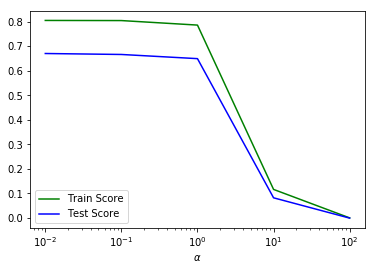

In [76]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [77]:
#Grid_Search
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Lasso(),param_grid,cv=5,return_train_score=True)
grid_search.fit(X_train,y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

Best parameters: {'alpha': 1}
Best cross-validation score: 0.78


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001197,3.993512e-04,0.000199,0.000399,0.001,{'alpha': 0.001},0.711750,0.772373,0.839692,0.812983,...,0.761654,0.062390,4,0.865682,0.806615,0.783630,0.803426,0.808353,0.813541,0.027534
1,0.000997,4.264961e-07,0.000199,0.000399,0.01,{'alpha': 0.01},0.711000,0.773323,0.839701,0.813764,...,0.762338,0.061978,3,0.865673,0.806610,0.783625,0.803422,0.808349,0.813536,0.027532
2,0.000798,3.989220e-04,0.000599,0.000489,0.1,{'alpha': 0.1},0.703530,0.781876,0.839458,0.819729,...,0.768310,0.058614,2,0.865058,0.806131,0.783045,0.802979,0.807923,0.813027,0.027498
3,0.000903,4.963602e-04,0.000406,0.000498,1,{'alpha': 1},0.652582,0.799481,0.831704,0.817578,...,0.783911,0.066459,1,0.840773,0.787063,0.760455,0.787324,0.790834,0.793290,0.026127
4,0.000998,2.492650e-05,0.000200,0.000400,10,{'alpha': 10},-0.020456,0.252622,-0.009534,0.173865,...,0.114253,0.109390,5,0.000000,0.211887,0.000000,0.288305,0.271541,0.154346,0.128558


In [78]:
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.7868
Test score: 0.6499


In [79]:
#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
bag_lasso = BaggingRegressor(lasso,n_estimators=500,max_samples=100,random_state=0)
bag_lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_lasso.score(X_test, y_test)))

Train score: 0.7448
Test score: 0.6140


In [80]:
#Pasting
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
bag_lasso = BaggingRegressor(lasso,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_lasso.score(X_test, y_test)))

Train score: 0.7414
Test score: 0.6081


In [81]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
ada_lasso = AdaBoostRegressor(lasso,n_estimators=200,learning_rate=0.01)
ada_lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ada_lasso.score(X_test, y_test)))

Train score: 0.7553
Test score: 0.5965


### SVM - Simple

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


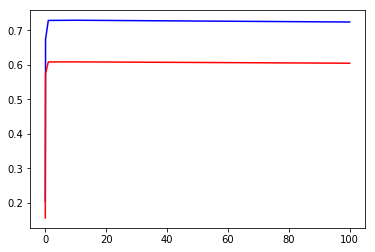

In [82]:
from sklearn.svm import LinearSVR
train_score = []
test_score = []
C = [0.01,0.1,1,10,100]

for i in C:
    svr = LinearSVR(C=i)
    svr.fit(X_train,y_train)
    train_score.append(svr.score(X_train,y_train))
    test_score.append(svr.score(X_test,y_test))

plt.plot(C,train_score,'b')
plt.plot(C,test_score,'r')

In [83]:
# Grid_Search
from sklearn.model_selection import GridSearchCV
param_grid ={'C':[0.001, 0.01, 0.1, 1, 10]} 
grid_search = GridSearchCV(LinearSVR(),param_grid,cv=5,return_train_score=True)

grid_search.fit(X_train,y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Best parameters: {'C': 10}
Best cross-validation score: 0.77


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001595,0.000489,0.000997,3.814697e-07,0.001,{'C': 0.001},-0.091630,-0.116338,-0.104225,-0.114310,...,-0.106469,0.008769,5,-0.096576,-0.078161,-0.081478,-0.082053,-0.083103,-0.084274,0.006369
1,0.001803,0.000403,0.000591,4.826302e-04,0.01,{'C': 0.01},0.083560,0.237928,0.126588,0.290889,...,0.214878,0.095792,4,0.185964,0.161183,0.153993,0.172186,0.162264,0.167118,0.011063
2,0.003191,0.000398,0.000801,4.007327e-04,0.1,{'C': 0.1},0.513606,0.777470,0.664235,0.730608,...,0.691160,0.097419,3,0.712051,0.632486,0.568299,0.661689,0.665474,0.647999,0.047304
3,0.024726,0.004264,0.000998,1.855381e-06,1,{'C': 1},0.628708,0.820321,0.791107,0.778238,...,0.769001,0.072403,2,0.804779,0.709885,0.681082,0.699367,0.722361,0.723495,0.042836
4,0.031301,0.003123,0.000599,4.886946e-04,10,{'C': 10},0.628287,0.816821,0.810379,0.778315,...,0.773128,0.074498,1,0.803367,0.719897,0.704673,0.699551,0.723377,0.730173,0.037675


In [84]:
svr = LinearSVR(C=10)
svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svr.score(X_test, y_test)))

Train score: 0.7282
Test score: 0.6079


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [85]:
#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
svr = LinearSVR(C=10)
bag_svr = BaggingRegressor(svr,n_estimators=500,max_samples=100,random_state=0)
bag_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_svr.score(X_test, y_test)))

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Train score: 0.7284
Test score: 0.6079


In [86]:
#Pasting
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
svr = LinearSVR(C=10)
bag_svr = BaggingRegressor(svr,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_svr.score(X_test, y_test)))

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Train score: 0.7284
Test score: 0.6079


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

In [87]:
#AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
svr = LinearSVR(C=10)
ada_svr = AdaBoostRegressor(svr,n_estimators=200,learning_rate=0.01)
ada_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ada_svr.score(X_test, y_test)))

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Train score: 0.7941
Test score: 0.6355


### SVM (Kernal = RBF)

In [88]:
# SVM(Kernel = RBF)

from sklearn.svm import SVR
from sklearn import metrics
param_grid = { "C":[0.0001,0.001,0.01,1,10],
             "gamma":[0.0001,0.001,0.01,1,10]
             }
svr_rbf = GridSearchCV(SVR(kernel='rbf'),param_grid,cv=5)

svr_rbf.fit(X_train,y_train)

print("Best parameters: {}".format(svr_rbf.best_params_))
print("Best cross-validation score: {:.2f}".format(svr_rbf.best_score_))
print('Train score: {:.4f}'.format(svr_rbf.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svr_rbf.score(X_test, y_test)))
pred = svr_rbf.predict(X_test)
print("Mean Squared Error Test:", metrics.mean_squared_error(y_test,pred))

Best parameters: {'C': 10, 'gamma': 0.01}
Best cross-validation score: 0.67
Train score: 0.6459
Test score: 0.5690
Mean Squared Error Test: 160.06934041135025


In [89]:
#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf',C=10,gamma=0.01)
bag_svr = BaggingRegressor(svr_rbf,n_estimators=500,max_samples=100,random_state=0)
bag_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_svr.score(X_test, y_test)))

Train score: 0.3566
Test score: 0.3020


In [90]:
#Pasting
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf',C=10,gamma=0.01)
bag_svr = BaggingRegressor(svr_rbf,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_svr.score(X_test, y_test)))

Train score: 0.3553
Test score: 0.3013


In [91]:
#Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf',C=10,gamma=0.01)
ada_svr = AdaBoostRegressor(svr_rbf,n_estimators=200,learning_rate=0.01)
ada_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ada_svr.score(X_test, y_test)))

Train score: 0.8929
Test score: 0.7412


### SVm (kernal = Poly)

In [92]:
# SVM(Kernel = Poly)
from sklearn.svm import SVR
param_grid = { "C":[0.0001,0.001,0.01,1,10],
             "gamma":[0.0001,0.001,0.01,1,10]
             }
svr_poly = GridSearchCV(SVR(kernel='poly'),param_grid,cv=5)

svr_poly.fit(X_train,y_train)

print("Best parameters: {}".format(svr_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(svr_poly.best_score_))
print('Train score: {:.4f}'.format(svr_poly.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svr_poly.score(X_test, y_test)))
pred = svr_poly.predict(X_test)
print("Mean Squared Error Test:", metrics.mean_squared_error(y_test,pred))

Best parameters: {'C': 1, 'gamma': 1}
Best cross-validation score: 0.78
Train score: 1.0000
Test score: 0.9288
Mean Squared Error Test: 26.45227912911085


In [93]:
#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly',C=1,gamma=1)
bag_svr = BaggingRegressor(svr_poly,n_estimators=500,max_samples=100,random_state=0)
bag_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_svr.score(X_test, y_test)))

Train score: 0.4611
Test score: 0.7126


In [94]:
#Pasting
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly',C=1,gamma=1)
bag_svr = BaggingRegressor(svr_poly,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_svr.score(X_test, y_test)))

Train score: 0.4258
Test score: 0.7285


In [95]:
#Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly',C=1,gamma=1)
ada_svr = AdaBoostRegressor(svr_poly,n_estimators=200,learning_rate=0.01)
ada_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ada_svr.score(X_test, y_test)))

Train score: 1.0000
Test score: 0.9603


### SVM (Kernal = Linear)

In [96]:
#SVM(Kernel = Linear

from sklearn.svm import SVR
param_grid = { "C":[0.0001,0.001,0.01,1,10],
             "gamma":[0.0001,0.001,0.01,1,10]
             }
svr_linear = GridSearchCV(SVR(kernel='linear'),param_grid,cv=5)

svr_linear.fit(X_train,y_train)

print("Best parameters: {}".format(svr_linear.best_params_))
print("Best cross-validation score: {:.2f}".format(svr_linear.best_score_))
print('Train score: {:.4f}'.format(svr_linear.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svr_linear.score(X_test, y_test)))
pred = svr_linear.predict(X_test)
print("Mean Squared Error Test:", metrics.mean_squared_error(y_test,pred))

Best parameters: {'C': 10, 'gamma': 0.0001}
Best cross-validation score: 0.77
Train score: 0.7289
Test score: 0.6092
Mean Squared Error Test: 145.16415620372575


In [97]:
#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',C=10,gamma=0.0001)
bag_svr = BaggingRegressor(svr_linear,n_estimators=500,max_samples=100,random_state=0)
bag_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_svr.score(X_test, y_test)))

Train score: 0.7432
Test score: 0.6533


In [98]:
#Pasting
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',C=10,gamma=0.0001)
bag_svr = BaggingRegressor(svr_linear,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_svr.score(X_test, y_test)))

Train score: 0.7448
Test score: 0.6488


In [99]:
#Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',C=10,gamma=0.0001)
ada_svr = AdaBoostRegressor(svr_linear,n_estimators=200,learning_rate=0.01)
ada_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ada_svr.score(X_test, y_test)))

Train score: 0.7938
Test score: 0.6245


### Polynomial Regression

In [100]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr.fit(X_train_poly, y_train)
print('Train score: {:.4f}'.format(lr.score(X_train_poly,y_train)))
print('Test score: {:.4f}'.format(lr.score(X_test_poly, y_test)))

Train score: 0.9987
Test score: -34.6266


In [101]:
from sklearn.ensemble import GradientBoostingRegressor
grad = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1)
grad.fit(X_train_poly,y_train)
print('Train score: {:.4f}'.format(grad.score(X_train_poly,y_train)))
print('Test score: {:.4f}'.format(grad.score(X_test_poly, y_test)))

Train score: 0.9995
Test score: 0.7613


### Overview of Regression scores

In [102]:
Regression = {'Model':['Linear Regression','KNN Regressor','Ridge Regression','Lasso Regression','SVR_linear','SVR_rbf','SVR_poly','Linear SVR','Polynomial Regression'],
             'Train Score':[0.8058,0.9,0.7939,0.7868,0.7289,0.6459,1,0.7289,0.9987],
              'Test Score':[0.6712,0.7054,0.6544,0.6499,0.6092,0.569,0.9288,0.6082,'N/A']}
Regression_score = pd.DataFrame(Regression)
Regression_score


,Model,Train Score,Test Score
0,Linear Regression,0.8058,0.6712
1,KNN Regressor,0.9000,0.7054
2,Ridge Regression,0.7939,0.6544
3,Lasso Regression,0.7868,0.6499
4,SVR_linear,0.7289,0.6092
5,SVR_rbf,0.6459,0.569
6,SVR_poly,1.0000,0.9288
7,Linear SVR,0.7289,0.6082
8,Polynomial Regression,0.9987,N/A


## PCA

In [103]:
from sklearn.decomposition import PCA
pca1 =PCA(n_components=0.95) 
XX1 = pca1.fit_transform(X_train)
print("Explained variance:",pca1.explained_variance_)
print("Number of components:",pca1.n_components_)

Explained variance: [3.62947435 1.24748894 1.14932209 1.03236755 0.96266602 0.90545825
 0.78755106 0.69082476 0.55639079 0.44564469 0.32356271]
Number of components: 11


In [104]:
pca = PCA(n_components=11)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(X_test)


In [105]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr_pca = LinearRegression()
lr_pca.fit(X_train_reduced,y_train)
print("PCA Score:%.4f"%lr_pca.score(X_train_reduced,y_train))
print("PCA Score:%.4f"%lr_pca.score(X_test_reduced,y_test))

PCA Score:0.7967
PCA Score:0.3717


In [106]:
#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
k_pca = KNeighborsRegressor(n_neighbors=2)
k_pca.fit(X_train_reduced,y_train)
print("PCA Score:%.4f"%k_pca.score(X_train_reduced,y_train))
print("PCA Score:%.4f"%k_pca.score(X_test_reduced,y_test))

PCA Score:0.9049
PCA Score:0.0464


In [107]:
#Ridge
from sklearn.linear_model import Ridge
ridge_pca = Ridge(alpha = 100)
ridge_pca.fit(X_train_reduced,y_train)
print("PCA Score:%.4f"%ridge_pca.score(X_train_reduced,y_train))
print("PCA Score:%.4f"%ridge_pca.score(X_test_reduced,y_test))

PCA Score:0.7860
PCA Score:0.3867


In [108]:
#Lasso
from sklearn.linear_model import Lasso
lasso_pca = Lasso(alpha=1)
lasso_pca.fit(X_train_reduced,y_train)
print("PCA Score:%.4f"%lasso_pca.score(X_train_reduced,y_train))
print("PCA Score:%.4f"%lasso_pca.score(X_test_reduced,y_test))

PCA Score:0.7605
PCA Score:0.3513


In [109]:
#Linear SVM
from sklearn.svm import SVR
svr_pca = LinearSVR(C=10)
svr_pca.fit(X_train_reduced,y_train)
print("PCA Score:%.4f"%svr_pca.score(X_train_reduced,y_train))
print("PCA Score:%.4f"%svr_pca.score(X_test_reduced,y_test))

PCA Score:0.7463
PCA Score:0.4962


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [110]:
#SVM_rbf
from sklearn.svm import SVR
svr_rbf_pca = SVR(kernel='rbf',C=10,gamma=0.01)
svr_rbf_pca.fit(X_train_reduced,y_train)
print("PCA Score:%.4f"%svr_rbf_pca.score(X_train_reduced,y_train))
print("PCA Score:%.4f"%svr_rbf_pca.score(X_test_reduced,y_test))

PCA Score:0.6434
PCA Score:0.3894


In [111]:
#SVM_poly
from sklearn.svm import SVR
svr_poly_pca = SVR(kernel='poly',C=1,gamma=1)
svr_poly_pca.fit(X_train_reduced,y_train)
print("PCA Score:%.4f"%svr_poly_pca.score(X_train_reduced,y_train))
print("PCA Score:%.4f"%svr_poly_pca.score(X_test_reduced,y_test))

PCA Score:1.0000
PCA Score:-12.7830


In [112]:
#SVM_linear
from sklearn.svm import SVR
svr_linear_pca = SVR(kernel='linear',C=10,gamma=0.0001)
svr_linear_pca.fit(X_train_reduced,y_train)
print("PCA Score:%.4f"%svr_linear_pca.score(X_train_reduced,y_train))
print("PCA Score:%.4f"%svr_linear_pca.score(X_test_reduced,y_test))

PCA Score:0.7453
PCA Score:0.4977


In [114]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lr_pca = LinearRegression()
poly_pca = PolynomialFeatures(degree=2)
X_train_poly_pca = poly.fit_transform(X_train_reduced)
X_test_poly_pca = poly.transform(X_test_reduced)
lr_pca.fit(X_train_poly_pca, y_train)
print("PCA Score:%.4f"%lr_pca.score(X_train_reduced,y_train))
print("PCA Score:%.4f"%lr_pca.score(X_test_reduced,y_test))

ValueError: shapes (620,11) and (78,) not aligned: 11 (dim 1) != 78 (dim 0)

### Overview of Regression scores after PCA


In [ ]:
PCA_Regression = {'Model':['Linear Regression','KNN Regressor','Ridge Regression','Lasso Regression','SVR_linear','SVR_rbf','SVR_poly','Linear SVR','Polynomial Regression'],
             'Train Score':[0.7967,0.9049,0.786,0.7605,0.7463,0.6434,1,0.745,'N/A'],
              'Test Score':[0.3717,0.0464,0.3867,0.3515,0.4977,0.3894,'N/A',0.4974,'N/A']}
PCA_Regression_score = pd.DataFrame(PCA_Regression)
PCA_Regression_score 


## DEEP LEARNING

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [45]:
X_train.shape

(620, 12)

In [ ]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(32,input_dim = 12 ,kernel_initializer='normal',activation = 'relu'))
#hidden layers
model1.add(Dense(16,input_dim = 12 ,kernel_initializer='normal',activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
model1.compile(loss= 'mean_absolute_error' , optimizer = 'adam',metrics = ['mean_absolute_error'] )

#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 50, batch_size = 300)
\
#step 4: evaluation

In [48]:
print(model1.evaluate(X_train, y_train))
print(model1.evaluate(X_test, y_test))

620/620 [==============================] - 0s 92us/sample - loss: 5.2431 - mean_absolute_error: 5.2431
[5.243070674711658, 5.2430706]
155/155 [==============================] - 0s 19us/sample - loss: 5.7948 - mean_absolute_error: 5.7948
[5.794782441662204, 5.7947826]


# MLP

In [1]:
#step 1: build model
model2 = Sequential()
#input layer
model2.add(Dense(20, input_dim = 12, activation = 'relu'))
#hidden layers
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(5, activation = 'relu'))
#output layer
model2.add(Dense(1, activation = 'sigmoid'))

#step 2: compile the model
model2.compile(loss= 'mean_squared_error' , optimizer = 'adam',metrics = ['accuracy'] )

#step 3: train the model
model2.fit(X_train, y_train, epochs = 30, batch_size = 150)

#step 4: evaluate

NameError: name 'Sequential' is not defined

In [52]:
print(model2.evaluate(X_train, y_train))
print(model2.evaluate(X_test, y_test))

620/620 [==============================] - 0s 109us/sample - loss: 328.4260 - mean_squared_error: 328.4260
[328.4259558893019, 328.42596]
155/155 [==============================] - 0s 19us/sample - loss: 400.5858 - mean_squared_error: 400.5858
[400.5857899327432, 400.5858]
